
## Author : DEBOLINA CHATTERJEE
### Task 2: MOVIE RATING PREDICTION WITH PYTHON 
### CODSOFT INTERNSHIP.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Load the data**

In [4]:
data = pd.read_csv(r'IMDb Movies India.csv', encoding='latin-1')


In [5]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(15509, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [10]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [11]:
data.dropna(inplace=True)


In [12]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [13]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [14]:
data['Year'] = data['Year'].str.extract('(\d+)') 
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [15]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce') 

In [16]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,2001,153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,1989,125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,1999,129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [17]:
data.dtypes

Name         object
Year          int64
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [18]:
data.shape

(5659, 10)

In [19]:
data['Duration'].dtypes

dtype('O')

In [20]:
data['Duration'] = data['Duration'].str.extract('(\d+)')
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')

In [21]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [22]:
data['Duration'].dtypes

dtype('int64')

**since it gives many null values , so we just remove "," to change the data types**

In [23]:
data['Votes'] = data['Votes'].str.replace(',', '').astype(int)
data["Votes"]

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int32

In [24]:
data.dtypes

Name         object
Year          int64
Duration      int64
Genre        object
Rating      float64
Votes         int32
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [25]:
Genre_count = data["Genre"].value_counts()
Genre_count.head(5)

Genre
Drama                   844
Drama, Romance          332
Action, Crime, Drama    329
Action, Drama           206
Comedy, Drama           205
Name: count, dtype: int64

In [26]:
print("Number of total directors are :", data["Director"].nunique())

Director_count = data["Director"].value_counts()
print("Among them top 10 movie makers on the basis of making number of movies are:" , Director_count.head(10))

Number of total directors are : 2431
Among them top 10 movie makers on the basis of making number of movies are: Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Name: count, dtype: int64


In [27]:
actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).nunique()
print("The number of Actors are:" ,actors)

The number of Actors are: 5041


In [28]:
actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).value_counts()
actors.head(10)

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
Shashi Kapoor         117
Jeetendra             116
Sanjay Dutt           101
Rekha                  92
Ajay Devgn             92
Name: count, dtype: int64

# Data Visualization

In [29]:
import seaborn as sns
import plotly.express as px


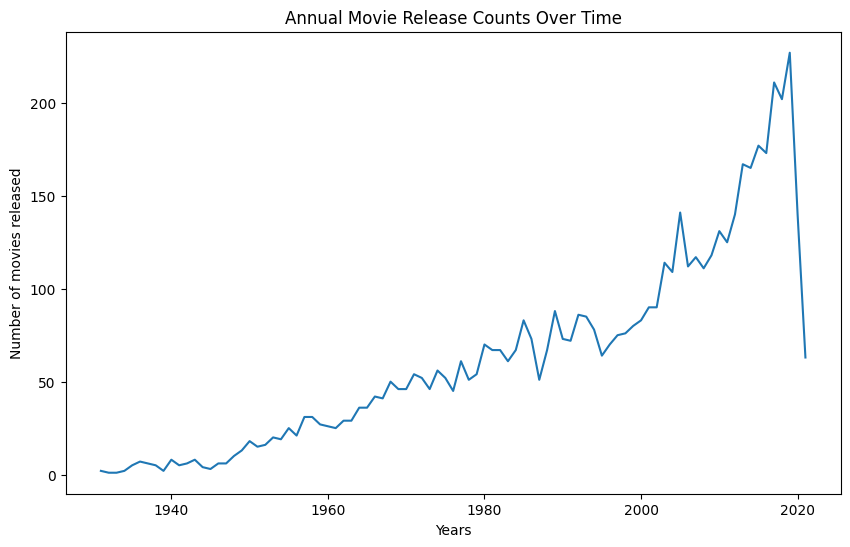

In [30]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=data['Year'].value_counts().sort_index())
ax.set_title("Annual Movie Release Counts Over Time")
ax.set_xlabel("Years")
ax.set_ylabel("Number of movies released")
plt.show()

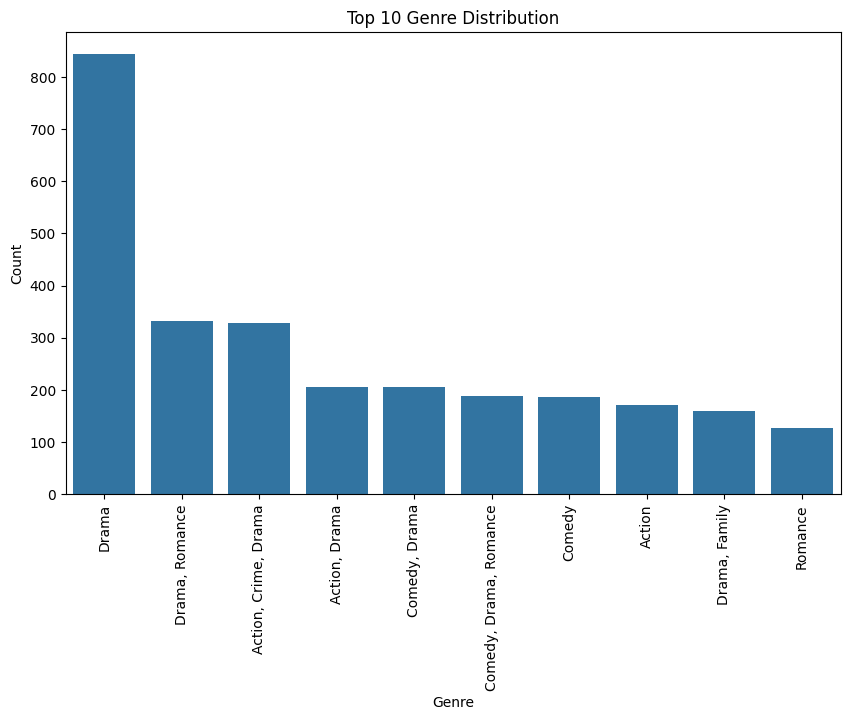

In [31]:

top_10_genre_counts = data['Genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_10_genre_counts.index, y=top_10_genre_counts.values)
ax.set_title("Top 10 Genre Distribution")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=90)

# Show the plot
plt.show()


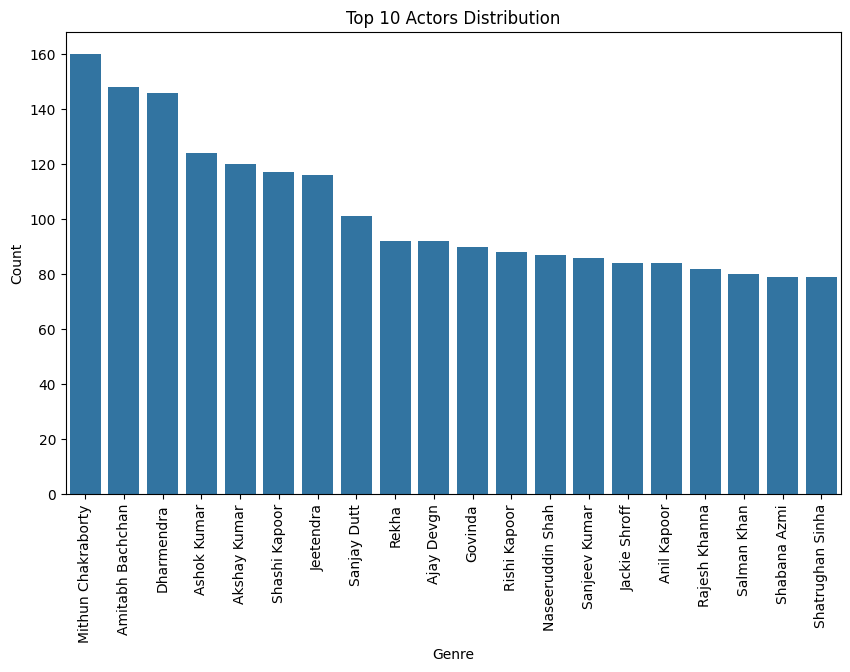

In [32]:
top_10_actors_counts =  pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']]).value_counts().head(20)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=top_10_actors_counts.index, y=top_10_actors_counts.values)
ax.set_title("Top 10 Actors Distribution")
ax.set_xlabel("Genre")
ax.set_ylabel("Count")
plt.xticks(rotation=90)

# Show the plot
plt.show()

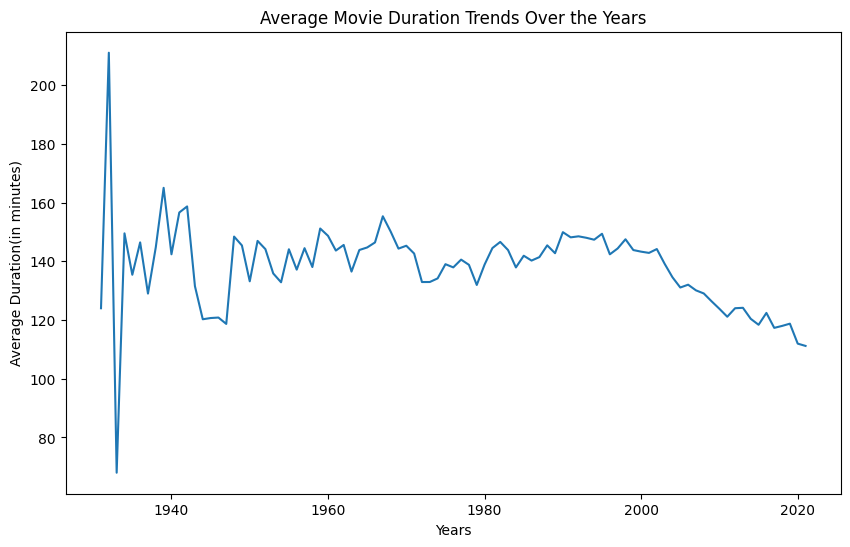

In [33]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=data.groupby('Year')['Duration'].mean().reset_index(), x='Year', y='Duration')
ax.set_title("Average Movie Duration Trends Over the Years")
ax.set_xlabel("Years")
ax.set_ylabel('Average Duration(in minutes)')
plt.show()

In [34]:
df = data.groupby('Genre')['Rating'].mean()
df1 =  df.nlargest(15)
df1

Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Animation, Comedy, Family          8.30
Biography, Family                  8.30
Music, Romance                     8.25
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Comedy, Musical, Drama             8.00
Documentary, History, News         8.00
Fantasy, Musical, Mystery          8.00
Documentary, History               7.95
Crime, Drama, History              7.90
Name: Rating, dtype: float64

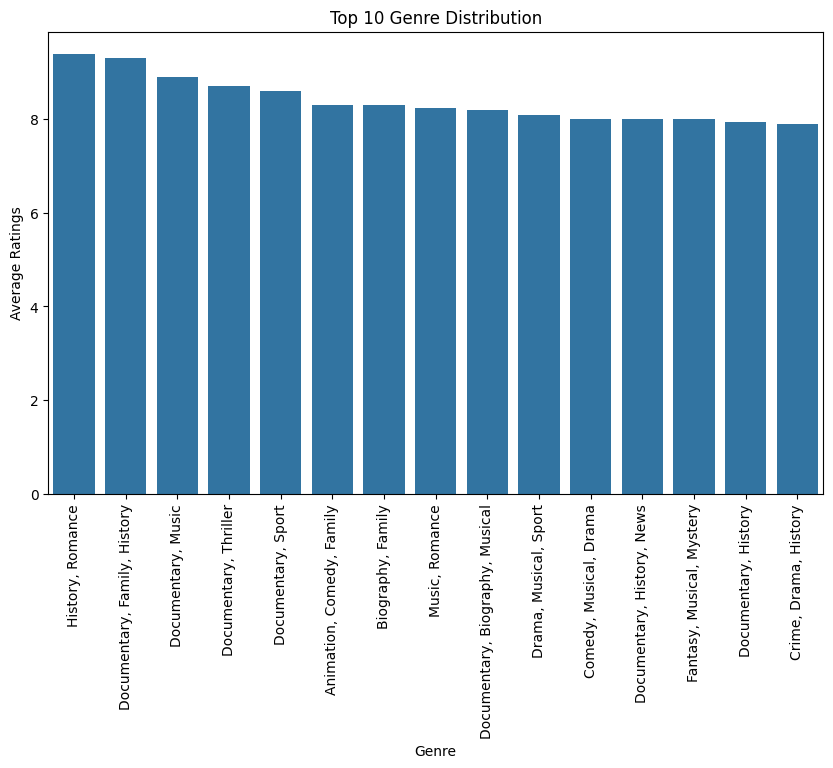

In [35]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=df1.index, y=df1.values)
ax.set_title("Top 10 Genre Distribution")
ax.set_xlabel("Genre")
ax.set_ylabel("Average Ratings")
plt.xticks(rotation=90)

# Show the plot
plt.show()

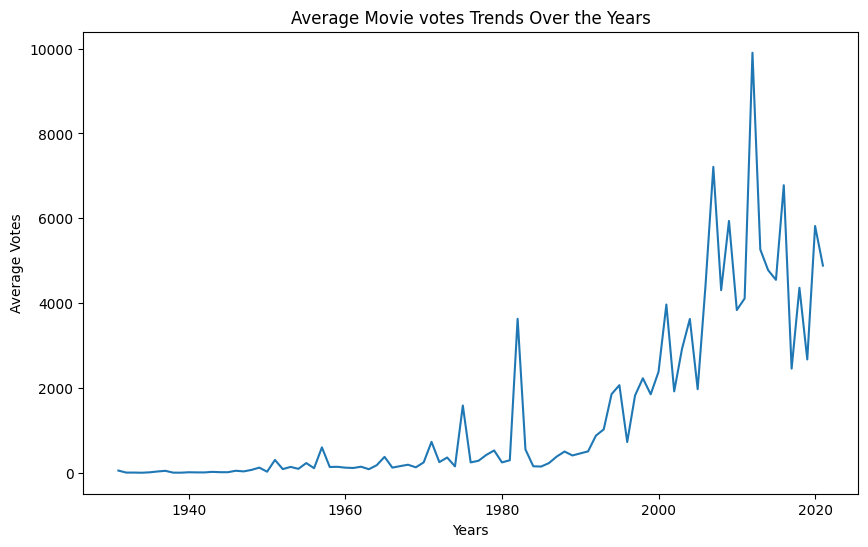

In [36]:
plt.figure(figsize=(10, 6))

ax = sns.lineplot(data=data.groupby('Year')['Votes'].mean().reset_index(), x='Year', y='Votes')
ax.set_title("Average Movie votes Trends Over the Years")

ax.set_xlabel("Years")
ax.set_ylabel('Average Votes')
plt.show()

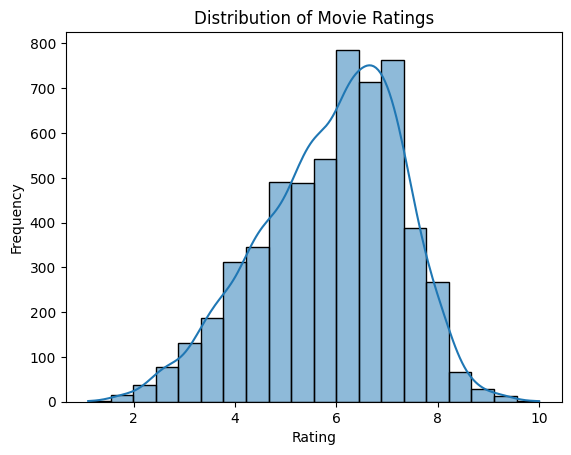

In [37]:
ax = sns.histplot(data = data, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')
plt.show()

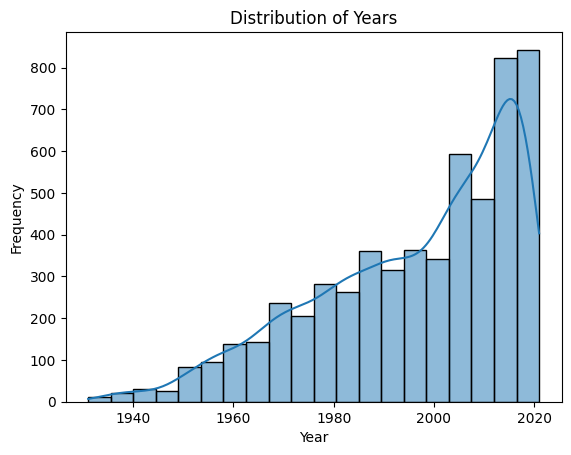

In [38]:
ax = sns.histplot(data = data, x = "Year", bins = 20, kde = True)
ax.set_xlabel('Year')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Years')
plt.show()

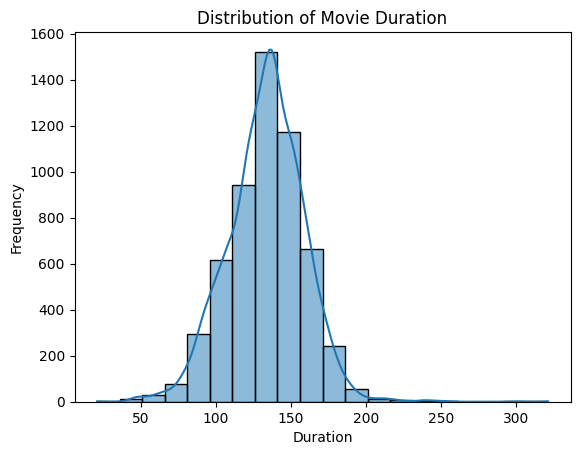

In [39]:
ax = sns.histplot(data = data, x = "Duration", bins = 20, kde = True)
ax.set_xlabel('Duration')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Duration')
plt.show()

**Movie Name Based Rankings**

Name
Love Qubool Hai        10.0
Half Songs              9.7
Gho Gho Rani            9.4
June                    9.4
The Reluctant Crime     9.4
Ashok Vatika            9.3
Baikunth                9.3
God of gods             9.3
Love Sorries            9.3
Refl3ct                 9.3
Name: Rating, dtype: float64


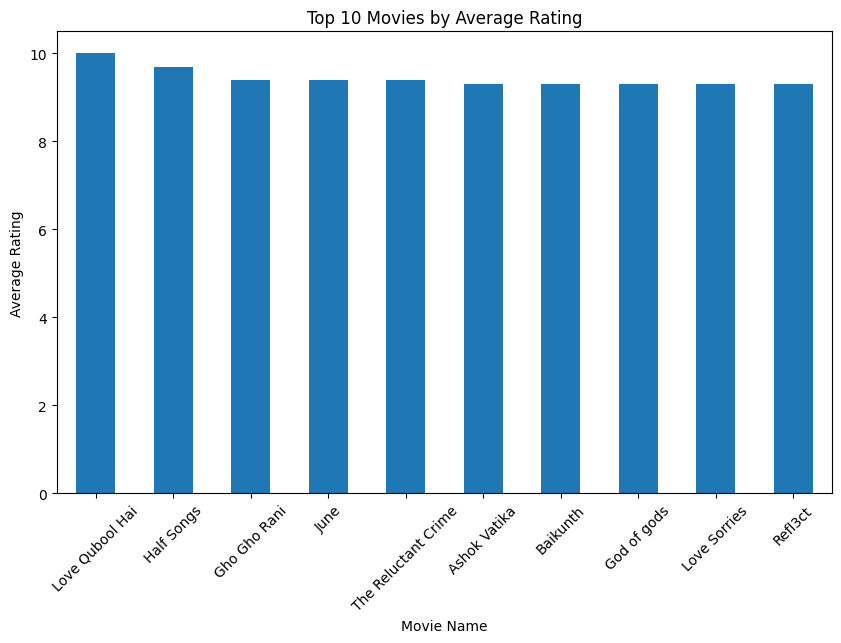

In [40]:
df2 = data.groupby('Name')['Rating'].mean()

# Get the top 10 movies with the highest sum of ratings
top_10_movies = df2.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_movies)

# Create a bar plot for the top 10 movies
top_10_movies.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Movie Name')
plt.ylabel('Average Rating')
plt.title('Top 10 Movies by Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Name
Life of Pi                591417
3 Idiots                  357889
Lion                      220526
Gandhi                    220118
The Darjeeling Limited    185127
Like Stars on Earth       175810
PK                        168150
Dangal                    165074
Radhe                     162455
Dil Bechara               117377
Name: Votes, dtype: int32


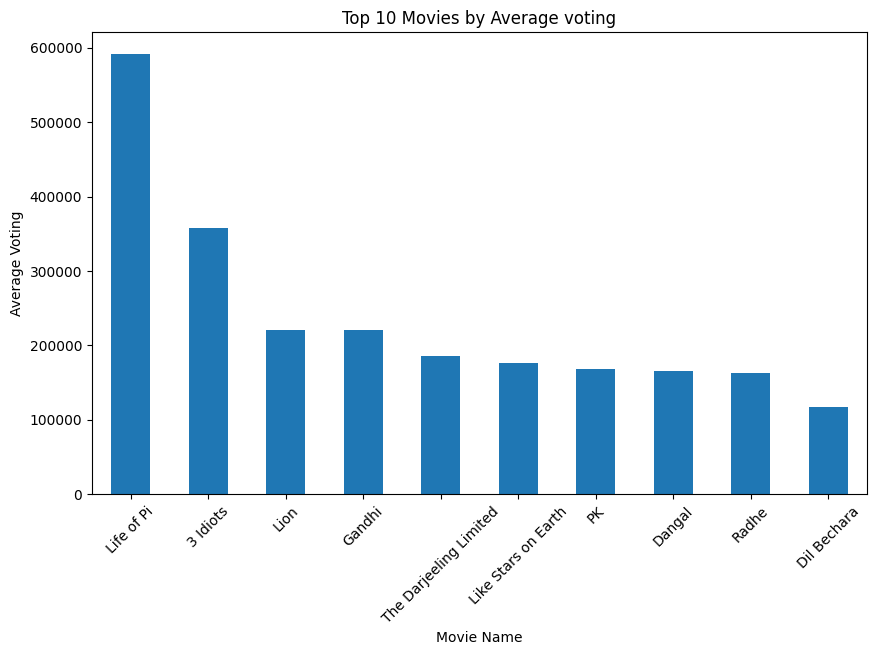

In [41]:
df3 = data.groupby('Name')['Votes'].sum()

# Get the top 10 movies with the highest sum of ratings
top_10_movies_votes = df3.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_movies_votes)

# Create a bar plot for the top 10 movies
top_10_movies_votes.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Movie Name')
plt.ylabel('Average Voting')
plt.title('Top 10 Movies by Average voting')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

**Director based rankings**

Director
Ang Lee                 591417.0
Garth Davis             220526.0
Richard Attenborough    220118.0
Wes Anderson            185127.0
Aamir Khan              175810.0
Rajkumar Hirani         139028.2
Mukesh Chhabra          117377.0
Steven Spielberg         79642.0
Lasse Hallström          78340.0
Anthony Maras            56048.0
Name: Votes, dtype: float64


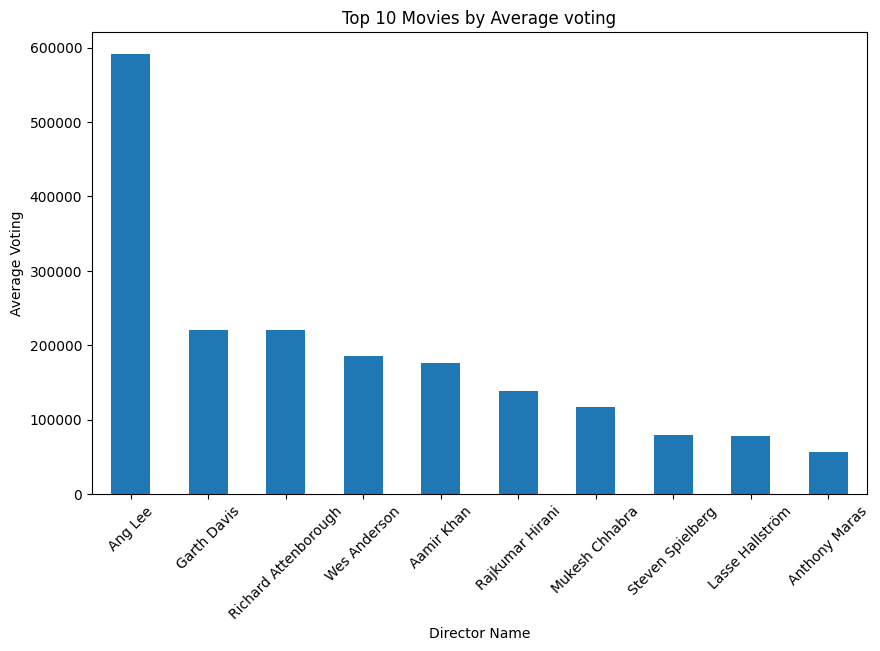

In [42]:
df4 = data.groupby('Director')['Votes'].mean()

# Get the top 10 movies with the highest sum of ratings
top_10_director = df4.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_director)

# Create a bar plot for the top 10 movies
top_10_director.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Director Name')
plt.ylabel('Average Voting')
plt.title('Top 10 Movies by Average voting')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Director
Saif Ali Sayeed    10.0
Sriram Raja         9.7
Arvind Pratap       9.4
Munni Pankaj        9.4
Suhrud Godbole      9.4
Gautam Joshi        9.3
Nikhil Mahar        9.3
Raghav Jairath      9.3
Rahul Mallick       9.3
Sapna Bhavnani      9.3
Name: Rating, dtype: float64


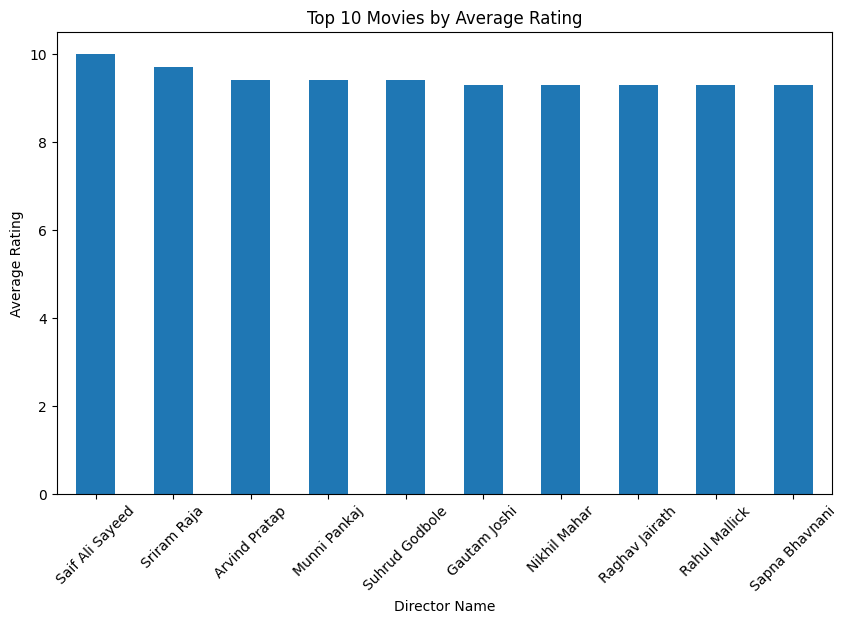

In [43]:
df5 = data.groupby('Director')['Rating'].mean()

# Get the top 10 movies with the highest sum of ratings
top_10_director_rating = df5.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_director_rating)

# Create a bar plot for the top 10 movies
top_10_director_rating.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Director Name')
plt.ylabel('Average Rating')
plt.title('Top 10 Movies by Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

**Genre Based**

Genre
History, Romance                   9.40
Documentary, Family, History       9.30
Documentary, Music                 8.90
Documentary, Thriller              8.70
Documentary, Sport                 8.60
Animation, Comedy, Family          8.30
Biography, Family                  8.30
Music, Romance                     8.25
Documentary, Biography, Musical    8.20
Drama, Musical, Sport              8.10
Name: Rating, dtype: float64


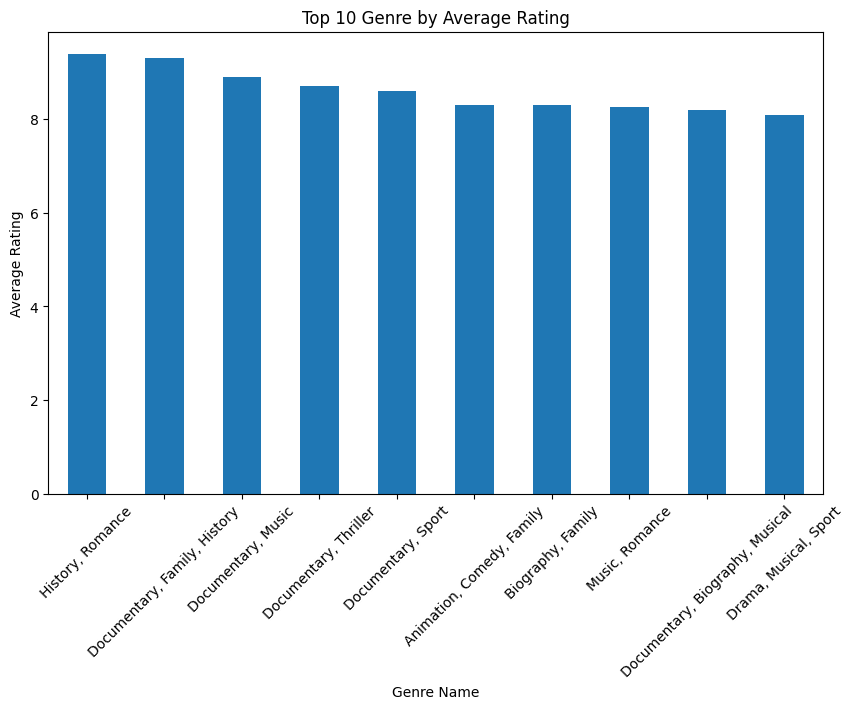

In [44]:
df6 = data.groupby('Genre')['Rating'].mean()

# Get the top 10 movies with the highest sum of ratings
top_10_genre = df6.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_genre)

# Create a bar plot for the top 10 movies
top_10_genre.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre Name')
plt.ylabel('Average Rating')
plt.title('Top 10 Genre by Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

Genre
Drama, Musical, Sport         107234.000000
Adventure, Drama, Fantasy      59348.200000
Action, Comedy, Horror         49164.000000
Adventure, Family, Fantasy     39831.500000
Crime, Drama, Music            26276.000000
Drama, Family, Sport           26210.000000
Action, Crime, Fantasy         23206.000000
Action, Biography, Drama       21826.833333
Biography, Drama, Sport        20181.166667
Drama, Fantasy, Horror         16474.500000
Name: Votes, dtype: float64


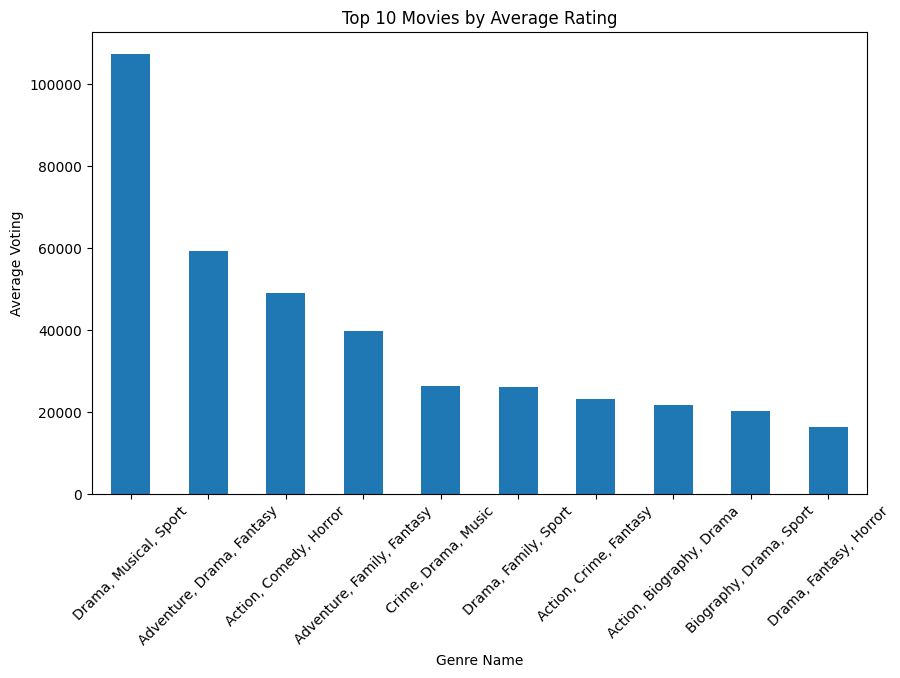

In [45]:
df7 = data.groupby('Genre')['Votes'].mean()

# Get the top 10 movies with the highest sum of ratings
top_10_genre_voting = df7.nlargest(10)

# Now 'top_10_movies' contains the top 10 movies with the highest sum of ratings
print(top_10_genre_voting)

# Create a bar plot for the top 10 movies
top_10_genre_voting.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Genre Name')
plt.ylabel('Average Voting')
plt.title('Top 10 Movies by Average Rating')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

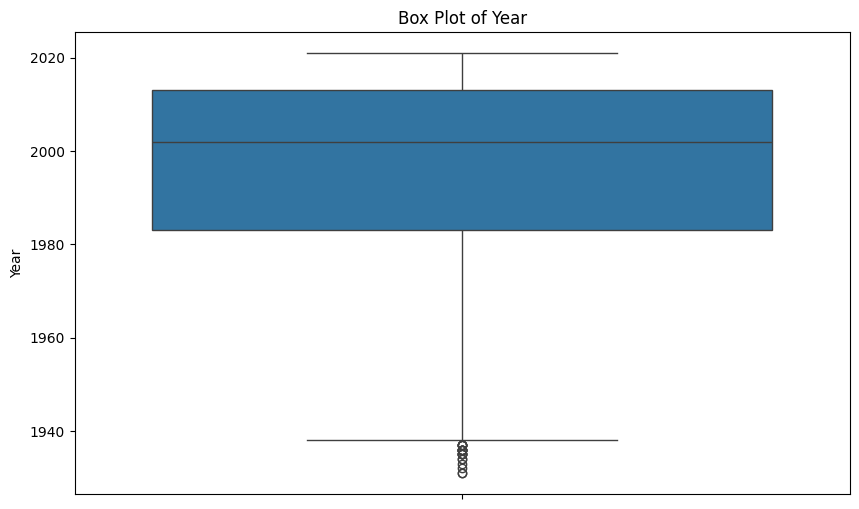

In [46]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data, y='Year')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Year')
plt.show()

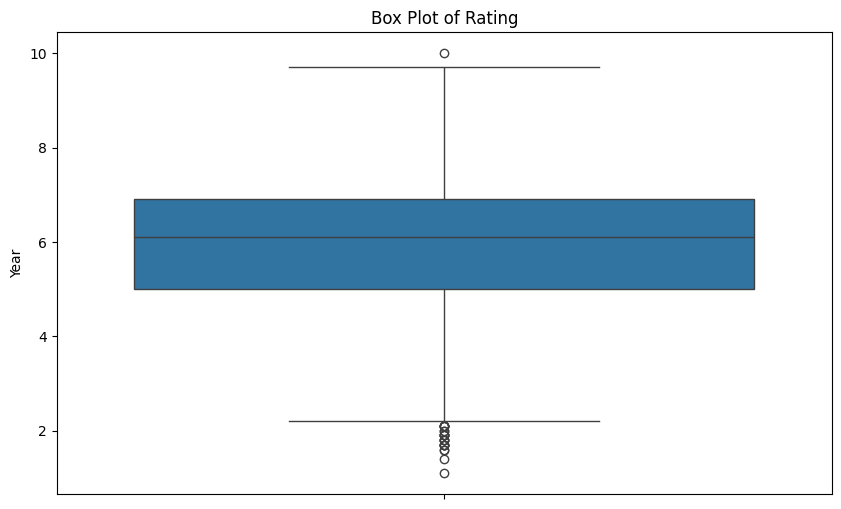

In [47]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data, y='Rating')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Rating')
plt.show()

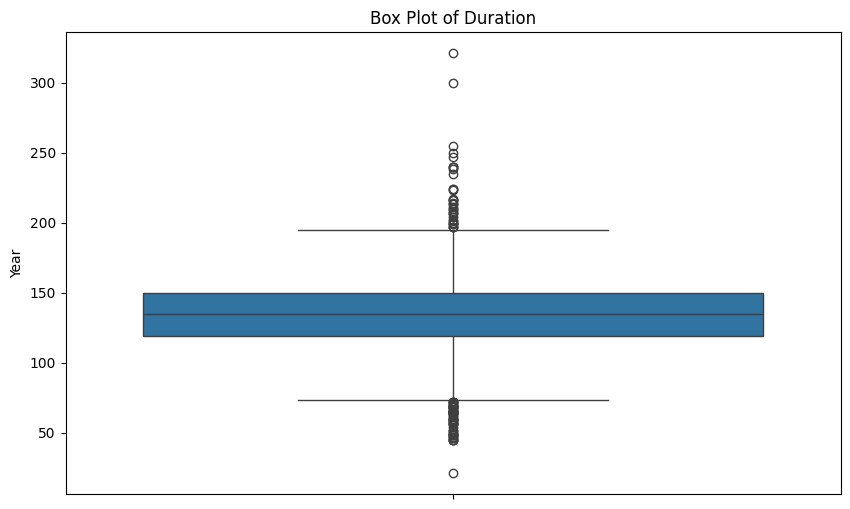

In [48]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data, y='Duration')
ax.set_ylabel('Year')
ax.set_title('Box Plot of Duration')
plt.show()

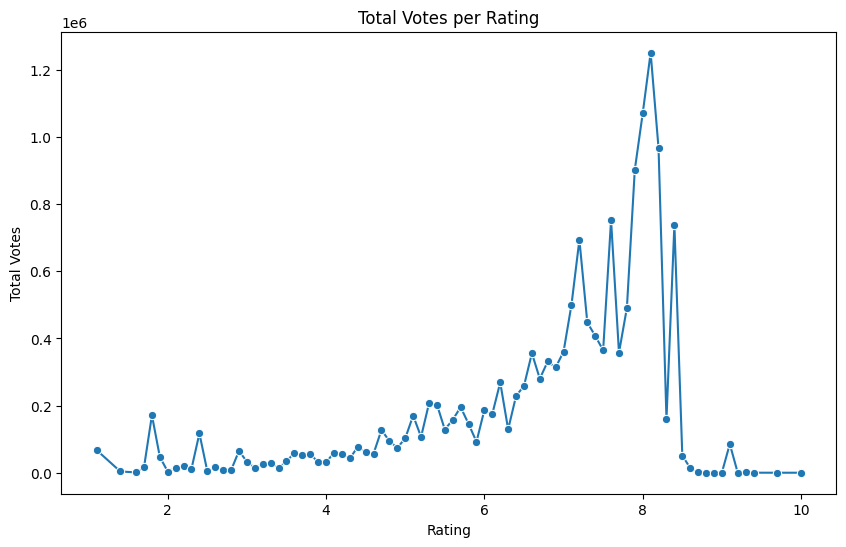

In [49]:
rating_votes = data.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 6))
ax_line_seaborn = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
ax_line_seaborn.set_xlabel('Rating')
ax_line_seaborn.set_ylabel('Total Votes')
ax_line_seaborn.set_title('Total Votes per Rating')
plt.show()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
Vikram Bhatt            30
Priyadarshan            29
Basu Chatterjee         23
Rama Rao Tatineni       23
Shyam Benegal           22
Yash Chopra             22
K. Bapaiah              22
Kanti Shah              21
Harmesh Malhotra        21
Shyam Ramsay            20
Name: count, dtype: int64


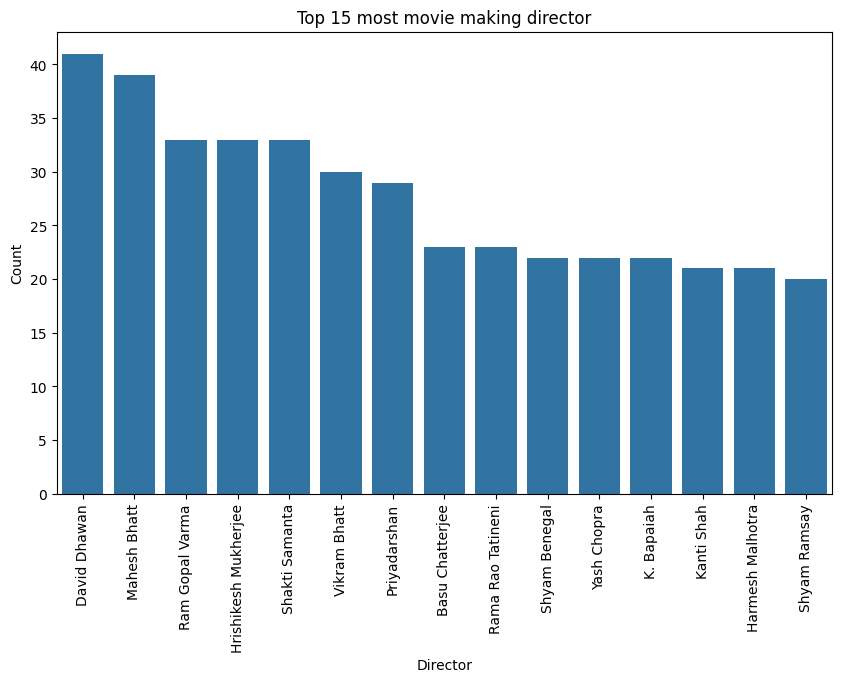

In [50]:
director_count = data['Director'].value_counts().head(15)

plt.figure(figsize=(10, 6))

ax = sns.barplot(x=director_count.index, y=director_count.values)
ax.set_title("Top 15 most movie making director")
ax.set_xlabel("Director")
ax.set_ylabel("Count")
plt.xticks(rotation=90)
print(director_count)
# Show the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

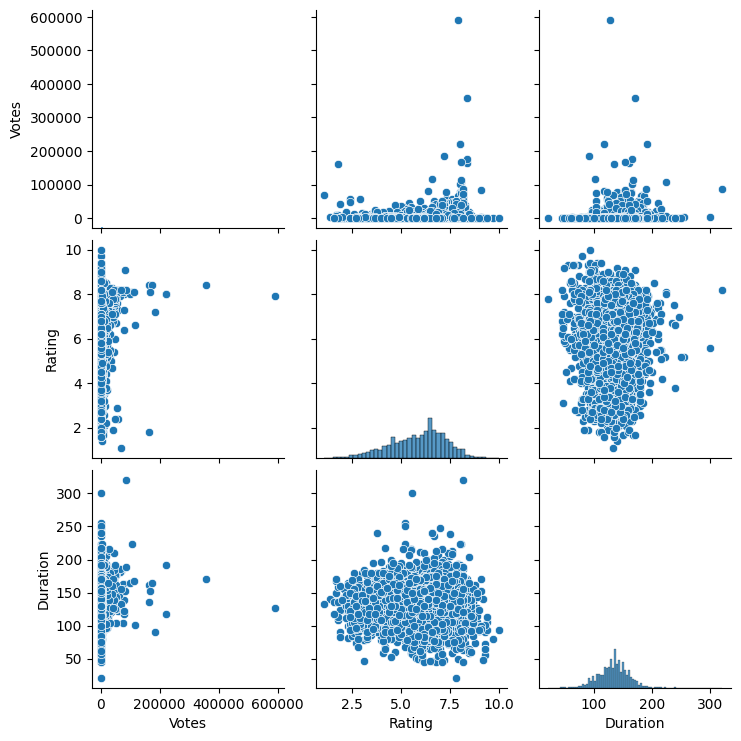

In [51]:
variables = ['Votes', 'Rating', 'Duration']
plt.figure(figsize=(10,6))
# Create a pairplot for the specified variables in the 'data' DataFrame
sns.pairplot(data[variables], kind="scatter")
plt.show()

In [52]:
correlation = data[['Votes', 'Rating', 'Duration']].corr()

<Axes: >

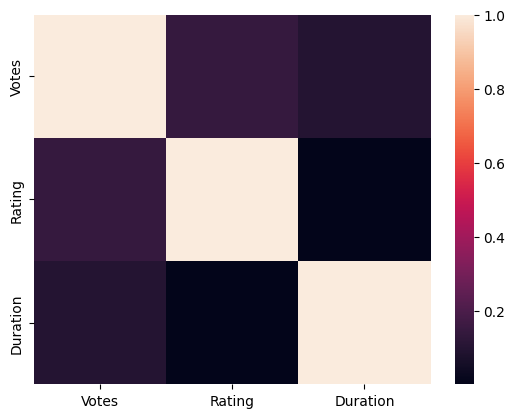

In [53]:
sns.heatmap(correlation)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
Input_data = data.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1)
Output_data= data['Rating']

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(Input_data, Output_data, test_size = 0.15, random_state = 42)

In [57]:
X_train

,Year,Duration,Votes
5684,2018,106,166
4014,2010,112,5232
9913,1979,116,15
2057,2013,64,58
8058,2021,68,522
...,...,...,...
10263,1979,120,159
14280,2010,75,62
14355,2005,88,35
14818,2018,135,12000


In [58]:
X_train.shape

(4810, 3)

In [59]:
X_test.shape

(849, 3)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# LinearRegression Algorithm

In [61]:
lr =LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [62]:
pred_1 = lr.predict(X_test)
pred_1

array([5.80705184, 5.76375793, 5.93139805, 5.62644144, 5.54825773,
       5.60744161, 5.49051647, 5.64227464, 6.00055567, 6.24780144,
       5.76230911, 5.70274045, 6.23946559, 5.8175128 , 6.2240386 ,
       6.59471813, 5.45420453, 6.34843439, 6.48231735, 5.31616311,
       6.14211089, 5.35667086, 5.50879143, 5.84884116, 6.04906454,
       5.81282824, 5.78172235, 6.17664485, 6.23915197, 5.656461  ,
       5.61644995, 5.87495922, 5.70850568, 6.10237085, 6.37188439,
       5.63836121, 6.07249592, 7.04405155, 5.49812995, 5.74438265,
       6.07183089, 5.66805057, 5.48252244, 5.74504403, 6.91726038,
       6.21402644, 5.50769347, 5.87717738, 6.31129883, 6.8779004 ,
       6.08370256, 6.08559907, 5.67371047, 5.70945546, 6.12762798,
       5.67574391, 5.80944821, 5.39453899, 5.7065608 , 5.63691141,
       6.10508122, 6.01397892, 7.09462588, 5.67453527, 5.73046292,
       6.54772123, 5.63049589, 5.55650315, 5.98116505, 5.89832275,
       5.52287265, 6.17077961, 6.47044557, 5.69763133, 6.20097

In [63]:
Y_test

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
10237    6.3
14598    7.0
9397     3.8
10354    7.4
3967     5.7
Name: Rating, Length: 849, dtype: float64

In [64]:
from sklearn.metrics import mean_absolute_error

# Assuming 'pred_1' contains your model's regression predictions and 'Y_test' contains the true target values
mae = mean_absolute_error(Y_test, pred_1)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.0663520115222938


# RandomForestRegressor ALGORITHM

In [65]:
rf = RandomForestRegressor()
rf.fit(X_train , Y_train)

RandomForestRegressor()

In [66]:
pred2 = rf.predict(X_test)
pred2

array([4.518     , 6.841     , 4.814     , 4.566     , 4.479     ,
       6.215     , 4.939     , 6.297     , 5.791     , 6.892     ,
       6.819     , 7.422     , 7.027     , 5.786     , 6.058     ,
       6.287     , 4.856     , 7.279     , 6.704     , 5.524     ,
       6.031     , 4.553     , 5.839     , 5.452     , 6.518     ,
       7.033     , 5.369     , 6.943     , 6.71      , 4.903     ,
       5.376     , 6.528     , 6.291     , 5.321     , 5.156     ,
       5.419     , 5.702     , 6.16      , 4.671     , 5.71      ,
       6.734     , 5.473     , 5.907     , 4.086     , 7.066     ,
       7.617     , 6.092     , 6.115     , 6.814     , 6.591     ,
       6.946     , 6.585     , 5.023     , 4.288     , 6.16      ,
       6.182     , 4.32      , 6.056     , 6.863     , 5.402     ,
       6.555     , 5.685     , 6.07      , 6.192     , 5.774     ,
       6.971     , 5.983     , 4.462     , 6.449     , 5.041     ,
       4.42566667, 6.608     , 6.799     , 5.54      , 6.1155 

In [67]:
mae2= mean_absolute_error(Y_test, pred2)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae2)


Mean Absolute Error: 0.9001443266588142


# DecisionTreeRegressor ALGORITHM

In [68]:
dt = DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [69]:
pred3 = dt.predict(X_test)
pred3

array([5.6 , 6.7 , 4.4 , 3.  , 6.1 , 5.4 , 4.2 , 4.8 , 4.8 , 6.8 , 6.8 ,
       7.4 , 7.1 , 5.8 , 6.3 , 6.2 , 5.9 , 7.4 , 6.9 , 5.4 , 5.6 , 5.1 ,
       5.7 , 5.9 , 6.5 , 6.  , 4.5 , 7.  , 5.4 , 4.  , 5.2 , 6.6 , 7.6 ,
       4.4 , 4.9 , 5.6 , 5.  , 6.8 , 5.7 , 5.6 , 6.8 , 5.4 , 5.3 , 2.7 ,
       6.2 , 8.1 , 2.1 , 9.1 , 7.7 , 7.  , 6.3 , 6.6 , 4.8 , 3.3 , 6.4 ,
       6.9 , 4.2 , 5.7 , 6.5 , 2.9 , 7.4 , 4.3 , 6.7 , 5.4 , 6.9 , 6.8 ,
       5.1 , 8.9 , 6.2 , 5.7 , 5.3 , 6.3 , 6.9 , 4.3 , 5.8 , 5.3 , 7.3 ,
       4.2 , 7.3 , 2.75, 6.9 , 8.2 , 5.7 , 7.7 , 5.6 , 7.  , 6.1 , 7.7 ,
       7.  , 6.2 , 4.8 , 3.8 , 7.2 , 6.6 , 3.5 , 6.5 , 4.7 , 4.6 , 5.3 ,
       4.8 , 7.  , 6.8 , 6.2 , 7.  , 6.5 , 8.1 , 7.9 , 6.4 , 7.2 , 6.2 ,
       2.4 , 7.2 , 6.7 , 6.4 , 5.  , 6.1 , 6.9 , 7.4 , 5.1 , 5.9 , 6.2 ,
       3.2 , 7.4 , 5.  , 4.5 , 4.4 , 6.7 , 7.8 , 4.1 , 6.8 , 4.6 , 2.8 ,
       7.3 , 5.1 , 2.7 , 3.9 , 4.1 , 4.1 , 4.9 , 7.6 , 3.  , 4.1 , 3.6 ,
       3.8 , 7.4 , 7.2 , 6.6 , 3.8 , 6.8 , 7.3 , 6.

In [70]:
mae3= mean_absolute_error(Y_test, pred3)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae3)

Mean Absolute Error: 1.2120730270906945


# XGBRegressor ALGORITHM

In [71]:
xgb = XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
pred4 = xgb.predict(X_test)
pred4

array([4.781338 , 7.0467687, 4.66418  , 4.796285 , 5.174964 , 6.3058376,
       5.646148 , 6.4814405, 5.2879705, 6.80068  , 6.9546127, 7.111715 ,
       6.609793 , 5.5258555, 5.5490375, 6.4145007, 4.8853555, 7.095909 ,
       6.8843246, 5.2521434, 5.973645 , 4.8226156, 5.113061 , 5.243828 ,
       6.5493994, 6.9102015, 5.1887517, 6.7527676, 7.3185916, 4.8647265,
       5.090728 , 6.6173105, 6.283897 , 5.5610075, 5.3183117, 5.3478556,
       5.6943874, 6.9465895, 6.0245147, 6.0195284, 6.668996 , 5.484613 ,
       5.607989 , 4.275979 , 6.932817 , 7.519287 , 5.841395 , 6.7172794,
       6.6465354, 6.8701286, 6.7832327, 6.428333 , 5.1741633, 4.0869164,
       6.5161896, 5.888179 , 4.0803585, 5.773478 , 6.814946 , 5.060182 ,
       6.6299696, 6.2598834, 7.3362885, 6.167704 , 6.1017866, 6.789086 ,
       6.087566 , 3.9020126, 5.8014703, 5.4201527, 4.9882007, 6.3686914,
       7.07174  , 5.4060373, 6.013739 , 5.051021 , 6.962079 , 5.957164 ,
       5.497662 , 3.3487096, 7.002304 , 6.7275605, 

In [73]:
mae4= mean_absolute_error(Y_test, pred4)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae4)

Mean Absolute Error: 0.9237113980157355


# KNN ALGORITHM

In [74]:
knn = KNeighborsRegressor()
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [75]:
pred5 = knn.predict(X_test)
pred5

array([4.96, 5.6 , 5.5 , 5.72, 5.82, 6.8 , 5.06, 5.1 , 5.76, 6.88, 5.82,
       6.86, 7.38, 5.1 , 5.7 , 6.24, 4.76, 7.02, 6.82, 5.66, 5.76, 4.78,
       5.58, 5.78, 5.78, 6.72, 6.06, 6.58, 6.92, 4.18, 5.76, 6.38, 5.52,
       5.4 , 5.52, 6.34, 5.42, 6.22, 5.14, 7.14, 6.62, 5.78, 5.86, 3.92,
       7.3 , 7.56, 5.12, 7.08, 6.92, 6.52, 5.82, 6.44, 5.36, 5.06, 5.44,
       6.74, 5.64, 5.7 , 6.74, 5.42, 7.3 , 5.56, 6.38, 6.5 , 6.02, 7.02,
       6.78, 5.28, 6.  , 5.26, 5.34, 6.64, 6.62, 5.4 , 5.94, 4.88, 7.14,
       5.06, 5.18, 3.54, 6.  , 6.18, 5.5 , 5.8 , 7.08, 6.46, 6.02, 7.28,
       7.42, 4.8 , 5.8 , 6.54, 6.88, 6.2 , 6.1 , 5.4 , 5.24, 5.38, 5.02,
       6.04, 6.06, 6.34, 7.08, 6.7 , 4.88, 7.84, 6.4 , 6.7 , 6.6 , 5.92,
       6.2 , 7.3 , 6.84, 5.54, 4.38, 5.68, 6.08, 5.34, 6.08, 4.96, 6.22,
       6.58, 6.66, 6.84, 5.66, 4.28, 6.42, 4.7 , 4.76, 6.52, 5.14, 4.86,
       5.48, 5.76, 5.26, 5.06, 5.84, 5.16, 5.78, 6.26, 7.08, 6.18, 5.6 ,
       4.5 , 6.12, 6.8 , 7.34, 4.5 , 7.18, 6.48, 4.

In [76]:
mae5= mean_absolute_error(Y_test, pred5)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae5)

Mean Absolute Error: 0.9754534746760896


# SVC ALGORITHM

In [77]:
from sklearn.svm import SVR

In [78]:
svr = SVR()
svr.fit(X_train , Y_train)

SVR()

In [79]:
pred6=svr.predict(X_test)
pred6

array([5.99049328, 5.99412555, 5.9979636 , 5.98514809, 5.96880385,
       6.09172483, 5.96082521, 5.99234154, 5.99101037, 5.9911549 ,
       6.23189796, 7.21824112, 7.33594684, 5.96235833, 5.99972143,
       6.0072203 , 5.95058449, 5.98660839, 6.00236678, 5.98925497,
       6.0010644 , 5.97826454, 6.00271822, 5.99397376, 5.99714403,
       6.89815262, 5.97191321, 5.98527148, 5.98772795, 5.98866164,
       5.94076299, 5.95651392, 6.47208549, 5.99940148, 6.00332952,
       6.50893035, 5.99977091, 6.0084617 , 5.95859651, 7.32092879,
       5.98871915, 5.99199324, 5.94567002, 5.98504033, 6.00524524,
       7.40797155, 5.96248893, 7.53569692, 6.00190441, 6.00889625,
       5.98136405, 5.99639191, 5.98682189, 5.97985635, 5.9942549 ,
       6.78606345, 5.97193299, 5.9919131 , 5.94300179, 5.97812344,
       5.99769836, 5.98996329, 6.01024432, 6.05089804, 6.20363652,
       5.99235679, 5.99206976, 5.97729996, 5.99667953, 5.99050203,
       5.99263229, 5.99896229, 6.00159162, 5.97018722, 6.00083

In [80]:
mae6= mean_absolute_error(Y_test, pred6)

# Print the Mean Absolute Error
print("Mean Absolute Error:", mae6)

Mean Absolute Error: 1.0679823871973526


# CATBOOST ALGORITHM

In [82]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor()
cb.fit(X_train,Y_train)

Learning rate set to 0.052476
0:	learn: 1.3674711	total: 148ms	remaining: 2m 27s
1:	learn: 1.3544440	total: 150ms	remaining: 1m 14s
2:	learn: 1.3408894	total: 152ms	remaining: 50.5s
3:	learn: 1.3285790	total: 154ms	remaining: 38.3s
4:	learn: 1.3181683	total: 157ms	remaining: 31.2s
5:	learn: 1.3079527	total: 160ms	remaining: 26.6s
6:	learn: 1.2983138	total: 163ms	remaining: 23.1s
7:	learn: 1.2887769	total: 165ms	remaining: 20.4s
8:	learn: 1.2807887	total: 168ms	remaining: 18.5s
9:	learn: 1.2723453	total: 173ms	remaining: 17.1s
10:	learn: 1.2645100	total: 177ms	remaining: 15.9s
11:	learn: 1.2578083	total: 179ms	remaining: 14.7s
12:	learn: 1.2514846	total: 182ms	remaining: 13.8s
13:	learn: 1.2456871	total: 187ms	remaining: 13.2s
14:	learn: 1.2415168	total: 193ms	remaining: 12.7s
15:	learn: 1.2356536	total: 196ms	remaining: 12.1s
16:	learn: 1.2318453	total: 201ms	remaining: 11.6s
17:	learn: 1.2266946	total: 205ms	remaining: 11.2s
18:	learn: 1.2228747	total: 208ms	remaining: 10.7s
19:	learn

In [83]:
pred7 = cb.predict(X_test)
pred7

array([5.11241854, 6.01862418, 4.5456209 , 4.81603318, 5.20737345,
       6.03393761, 5.23295101, 6.61702767, 5.51877213, 6.83436531,
       6.71934055, 6.89771903, 7.08942837, 6.00996184, 6.05875683,
       6.632789  , 5.15041756, 7.35029323, 6.87361038, 5.25121577,
       5.98920744, 5.11452067, 5.76184367, 5.49562889, 6.45651954,
       6.83841338, 5.2476056 , 6.98070027, 6.94286569, 5.18579211,
       5.46935402, 6.51699919, 6.22744904, 5.72448394, 5.70702094,
       5.51126297, 5.54862595, 6.22658111, 4.97302445, 6.58313333,
       6.71040295, 5.61785427, 6.02191129, 4.62587243, 6.39259152,
       7.43787393, 5.41953841, 6.32146064, 6.39253868, 6.75535277,
       6.66097441, 6.53560799, 5.49150718, 4.64814276, 6.24233892,
       6.05917872, 5.06149465, 5.95142393, 6.91244895, 4.88433605,
       6.71005675, 6.1075895 , 6.97654552, 6.14003343, 5.98822985,
       7.22809367, 6.14904375, 5.27174473, 5.80336675, 5.42793677,
       5.22345673, 6.42362834, 6.94401206, 5.16225337, 5.97289

In [84]:
mae7 = mean_absolute_error(pred7 , Y_test)
print('Accuracy :' , mae7)

Accuracy : 0.8561290181658088
